In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data          
from skimage import io            
from skimage import color        
from skimage import filters       
from skimage.util import img_as_float, img_as_ubyte, random_noise

In [13]:
benchmark_image_name = 'camera'
laplacian_sharpen_amount = 0.7
noise_mode = 'gaussian'
noise_parameter = 0.01

In [14]:
try:
    original_image = getattr(data, benchmark_image_name)()
    print(f"Loaded benchmark image: '{benchmark_image_name}'")
except AttributeError:
    print(f"Error: Benchmark image '{benchmark_image_name}' not found.")
    print("Falling back to 'camera'.")
    original_image = data.camera()
    benchmark_image_name = 'camera'

Loaded benchmark image: 'camera'


In [15]:
image_float = img_as_float(original_image)
if image_float.ndim == 3:
    gray_image_float = color.rgb2gray(image_float)
    print("Converted color image to grayscale.")
else:
    gray_image_float = image_float

In [17]:
if noise_mode == 'gaussian':
    if noise_parameter < 0:
            print(f"Warning: Noise variance ('noise_parameter') cannot be negative. Using absolute value: {abs(noise_parameter)}")
            noise_parameter = abs(noise_parameter)
    noisy_image_float = random_noise(gray_image_float, mode='gaussian', var=noise_parameter)
    print(f"Successfully added 'gaussian' noise with variance: {noise_parameter}")

elif noise_mode == 's&p':
    if not (0 <= noise_parameter <= 1):
            print(f"Warning: S&P noise amount ('noise_parameter') should be between 0 and 1. Clamping value to range.")
            noise_parameter = np.clip(noise_parameter, 0.0, 1.0)
    noisy_image_float = random_noise(gray_image_float, mode='s&p', amount=noise_parameter)
    print(f"Successfully added 's&p' noise with amount: {noise_parameter}")

Successfully added 'gaussian' noise with variance: 0.01


In [18]:
laplacian_original = filters.laplace(gray_image_float)
laplacian_noisy = filters.laplace(noisy_image_float)

In [19]:
sharpened_original = gray_image_float - laplacian_sharpen_amount * laplacian_original
sharpened_noisy = noisy_image_float - laplacian_sharpen_amount * laplacian_noisy

In [20]:
sharpened_original = np.clip(sharpened_original, 0.0, 1.0)
sharpened_noisy = np.clip(sharpened_noisy, 0.0, 1.0)

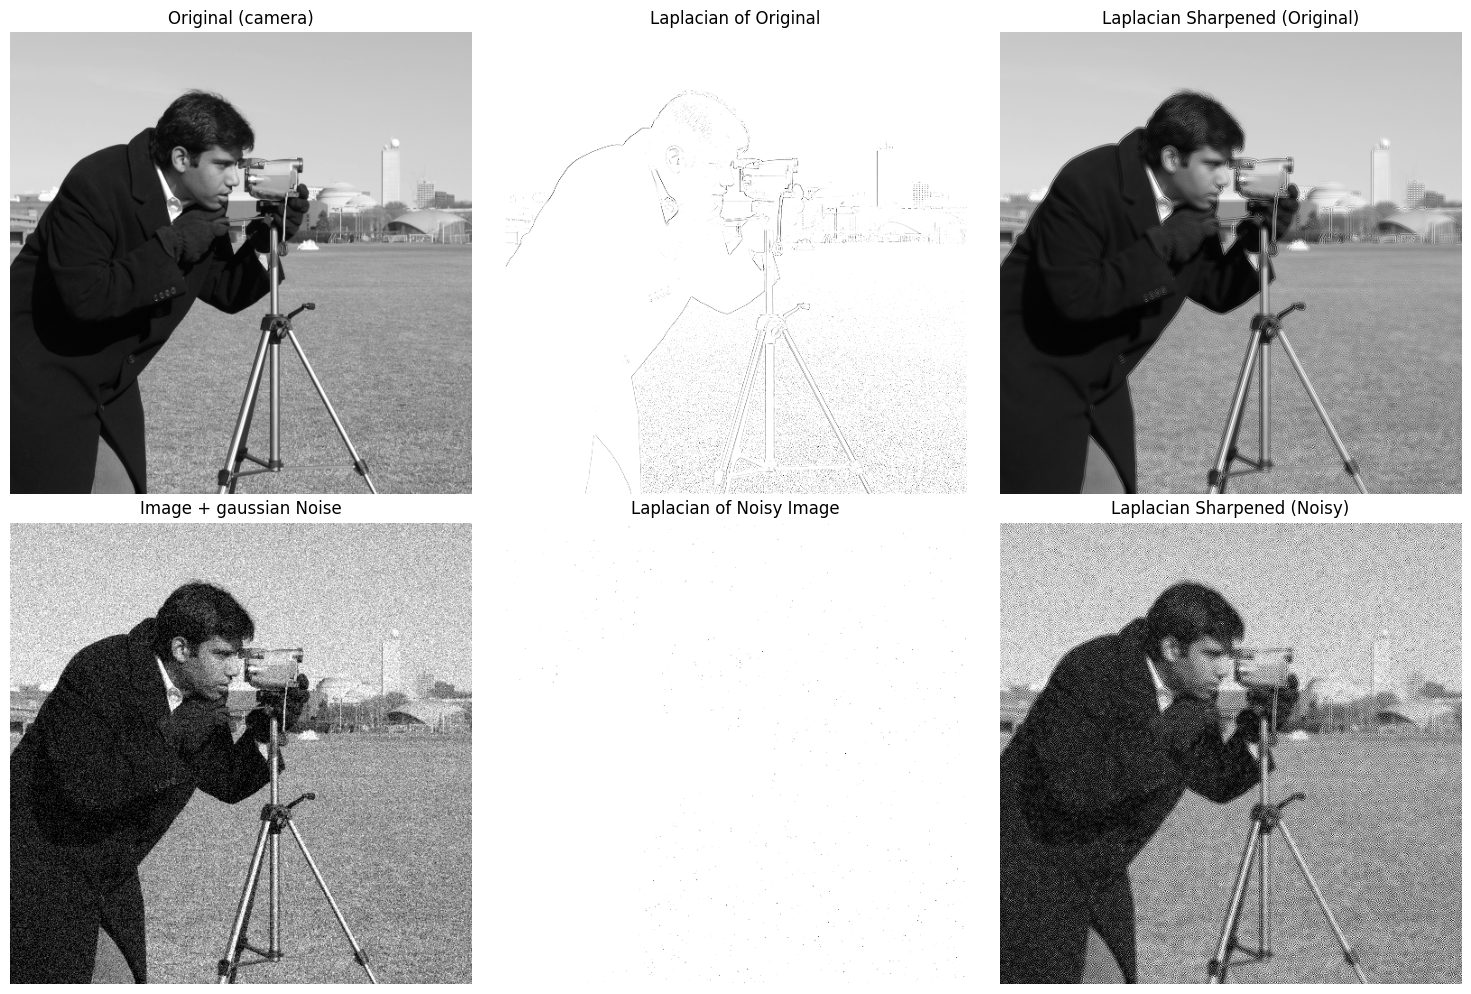

In [21]:
gray_image_ubyte = img_as_ubyte(gray_image_float)
noisy_image_ubyte = img_as_ubyte(noisy_image_float)
laplacian_original_display = img_as_ubyte(np.clip(laplacian_original - np.min(laplacian_original), 0, 1))
laplacian_noisy_display = img_as_ubyte(np.clip(laplacian_noisy - np.min(laplacian_noisy), 0, 1))       
sharpened_original_ubyte = img_as_ubyte(sharpened_original)
sharpened_noisy_ubyte = img_as_ubyte(sharpened_noisy)


plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(gray_image_ubyte, cmap='gray')
plt.title(f'Original ({benchmark_image_name})')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(laplacian_original_display, cmap='gray')
plt.title('Laplacian of Original')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(sharpened_original_ubyte, cmap='gray')
plt.title(f'Laplacian Sharpened (Original)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(noisy_image_ubyte, cmap='gray')
plt.title(f'Image + {noise_mode} Noise')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(laplacian_noisy_display, cmap='gray')
plt.title('Laplacian of Noisy Image')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(sharpened_noisy_ubyte, cmap='gray')
plt.title('Laplacian Sharpened (Noisy)')
plt.axis('off')


plt.tight_layout() 
plt.show()